In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob

In [3]:
folder_list=glob.glob('E:/glass_git/AI-portfolio/order_batch_picking/data/Orderlinelist/*.txt')

TOTAL_ORDER=[]
RACK_NUM=[]
BAY_NUM=[]
TIER_NUM=[]
SLOT_NUM=[]
for file in folder_list:
    orders=pd.read_csv(file,sep='\t',header=None)
    cols=['order_num','index','rack','bay','tier','slot']
    orders.columns=cols
    TOTAL_ORDER+=list(orders['order_num'].unique())
    RACK_NUM+=list(orders['rack'].unique())
    BAY_NUM+=list(orders['bay'].unique())
    TIER_NUM+=list(orders['tier'].unique())
    SLOT_NUM+=list(orders['slot'].unique())


In [5]:
print(f'Number of orders: {len(TOTAL_ORDER)}')
print(f'Rack range: {np.min(RACK_NUM)},{np.max(RACK_NUM)}')
print(f'Bay range: {np.min(BAY_NUM)},{np.max(BAY_NUM)}')
print(f'Tier range: {np.min(TIER_NUM)},{np.max(TIER_NUM)}')
print(f'Slot range: {np.min(SLOT_NUM)},{np.max(SLOT_NUM)}')

Number of orders: 767900
Rack range: 1,24
Bay range: 1,120
Tier range: 0,0
Slot range: 1,2880


<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32124\1591797079.py:2: SyntaxWarning: invalid escape sequence '\g'
  orders=pd.read_csv('E:\glass_git\AI-portfolio\order_batch_picking\data\Orderlinelist\OrderLineList_LargeProblems_1_23.txt',sep='\t',header=None)


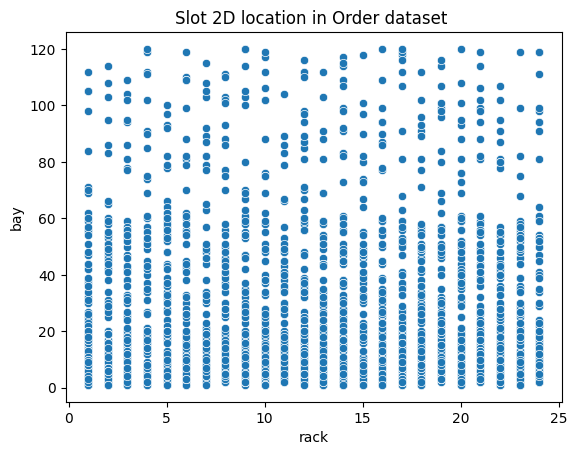

In [3]:
#check rack, bay location by plot
orders=pd.read_csv('E:\glass_git\AI-portfolio\order_batch_picking\data\Orderlinelist\OrderLineList_LargeProblems_1_23.txt',sep='\t',header=None)
cols=['order_num','index','rack','bay','tier','slot']
orders.columns=cols
sns.scatterplot(data=orders,x='rack',y='bay')
plt.title('Slot 2D location in Order dataset ')
plt.show()
plt.close()


fig = px.scatter_3d(orders, x='rack', y='bay', z='tier',
              color='order_num',size_max=1)

fig.update_layout(
    title='Slot 3D location in Order dataset',
    width=800,   
    height=800  
)


fig.show()
plt.close()

In [2]:
location=pd.read_csv('E:/glass_git/AI-portfolio/order_batch_picking/data/Distance matrix/location.csv')
cols=['order_num','index','rack','bay','tier','slot']

location.head(0)

,aisle,rack,bay,slot,x,y


In [35]:
#에피소드1 데이터셋 생성

AISLE =[1,5,8,11]

ORDER_NUM=[]
SLOT=[]
JOB=[]
order_id=1
for i,a in enumerate(AISLE):
    for o in range(25):
        sample_num=np.random.randint(1,15)
        SAMPLE=location[location['aisle']==a].sample(sample_num)
        ORDER_NUM+=[order_id]*sample_num
        SLOT+=SAMPLE['slot'].to_list()
        JOB+=[i+1]*sample_num
        order_id+=1

DF=pd.DataFrame({'job':JOB,'order_num':ORDER_NUM, 'slot':SLOT})
DF.to_csv('E:/glass_git/AI-portfolio/order_batch_picking/data/Order/episode1_orders.csv',index=False)

In [2]:
import random
random.randrange(3)

1

In [36]:
DF.order_num.nunique()

100

In [37]:
DF.job.nunique()

4

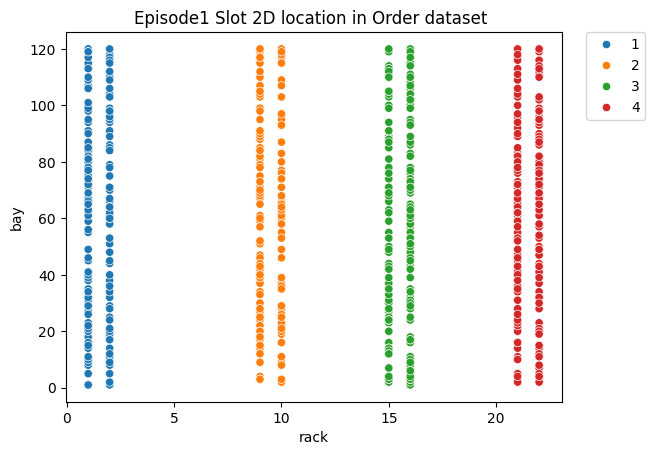

In [39]:
merge_df=DF.merge(location,on='slot',how='left')

sns.scatterplot(data=merge_df,x='rack',y='bay',hue='job',palette='tab10')
plt.title('Episode1 Slot 2D location in Order dataset ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.close()
